# Example of swift Cygnus project PY access

In [2]:
def swift_get_image_h5(file):
    import requests
    import os
    import cygnus_lib as cy
    BASE_URL  = "https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/"

    url = BASE_URL+file
    r = requests.get(url)
    tmpname = "./tmp." + str(os.getpid()) + ".h5"
    with open(tmpname, 'wb') as tmp:
            tmp.write(r.content)
    image = cy.read_image_h5(tmpname)
    try:
        os.remove(tmpname)
    except OSError:
        pass
    return image

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


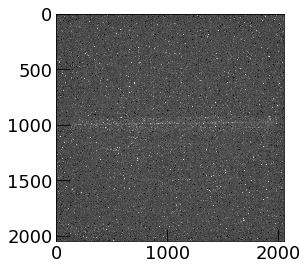

In [3]:
import matplotlib.pyplot as plt
import cygnus_lib as cy
%matplotlib inline
cy.set_atlas_style('small')
file  = 'Data/BTF/Data_Camera/H5/Run058/run058-0010.h5'
image = swift_get_image_h5(file)

plt.imshow(image, cmap="gray", vmin=85,vmax=140)
plt.show()

In [84]:
def swift_listdir(dirname):
    import requests
    BASE_URL  = "https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/"
    r = requests.get(BASE_URL, stream=True)
    r = r.content
    string = r.decode("ISO-8859-1")
    dati = string.split('\n')

    fileindir=[]
    for data in dati:
        if dirname in data:
            fileindir.append(data)
    return fileindir

    

In [85]:
swift_listdir('run831')

[]

In [96]:
import requests
liburl = "https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/"
#r = requests.get(liburl)
r = requests.post(liburl)
#print (r.content)
print (r.status_code)
print (r.headers['content-type'])
print (r.text)

401
text/html; charset=UTF-8
<html><h1>Unauthorized</h1><p>This server could not verify that you are authorized to access the document you requested.</p></html>


ModuleNotFoundError: No module named 'urllib2'